In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import glob
from skimage.io import imread, imshow
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [2]:
train_path = r'C:\Users\agraw\Downloads\archive (1)\For use\TRAIN'
test_path = r'C:\Users\agraw\Downloads\archive (1)\For use\TEST'
val_path = r'C:\Users\agraw\Downloads\archive (1)\For use\VAL'
image_size = [512,512,3]

In [3]:

train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

In [4]:

training_set = train_datagen.flow_from_directory(train_path,target_size = (512,512),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2341 images belonging to 2 classes.


In [5]:
test_set = train_datagen.flow_from_directory(test_path,target_size = (512,512),shuffle= False,
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 600 images belonging to 2 classes.


In [6]:
val_set = train_datagen.flow_from_directory(val_path,target_size = (512,512),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 240 images belonging to 2 classes.


In [7]:
Xception = tf.keras.applications.Xception(
    input_shape= image_size,
    include_top=False,
    weights="imagenet",
)

In [8]:
for layer in Xception.layers:
    layer.trainable = False

In [10]:
x = Flatten()(Xception.output)
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=Xception.input, outputs=prediction)

In [11]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 255, 255, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 255, 255, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 255, 255, 32) 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
r = model.fit(
  training_set,
  validation_data=val_set,
  epochs=5
)

Epoch 1/5
74/74 [==============================] - 744s 10s/step - loss: 105.3022 - accuracy: 0.8710 - val_loss: 16.1564 - val_accuracy: 0.9625
Epoch 2/5
74/74 [==============================] - 759s 10s/step - loss: 64.4323 - accuracy: 0.9090 - val_loss: 20.8741 - val_accuracy: 0.9583
Epoch 3/5
74/74 [==============================] - 821s 11s/step - loss: 37.8291 - accuracy: 0.9381 - val_loss: 19.1884 - val_accuracy: 0.9583
Epoch 4/5
74/74 [==============================] - 827s 11s/step - loss: 36.5457 - accuracy: 0.9389 - val_loss: 72.2326 - val_accuracy: 0.9000
Epoch 5/5
74/74 [==============================] - 813s 11s/step - loss: 38.8521 - accuracy: 0.9449 - val_loss: 9.8863 - val_accuracy: 0.9875


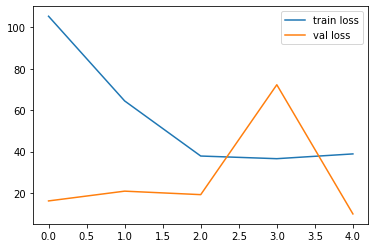

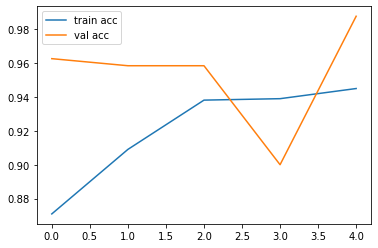

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
model.evaluate(test_set)

19/19 [==============================] - 179s 9s/step - loss: 30.0236 - accuracy: 0.9483


[30.02359962463379, 0.9483333230018616]

In [18]:
from sklearn.metrics import confusion_matrix

#Confution Matrix and Classification Report
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))


#print('Classification Report')
#target_names = ['Pneumonia','Non-Pneumonia']
#print(classification_report(test_set.classes, y_pred, target_names=target_names))////


Confusion Matrix
[[286  14]
 [ 17 283]]


In [17]:
from sklearn.metrics import classification_report
print('Classification Report')
target_names = list(training_set.class_indices.keys())

print(classification_report(test_set.classes, y_pred, target_names=target_names))





Classification Report
              precision    recall  f1-score   support

      NORMAL       0.94      0.95      0.95       300
   PNEUMONIA       0.95      0.94      0.95       300

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600

